# Libraries

In [1]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go
from plotly.offline import iplot
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Load the dataset

In [2]:
data=pd.read_csv("gun-violence-data_01-2013_03-2018.csv")
data.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [3]:
data= data.sample(n=23000, random_state=42)
data.to_csv("data.csv", index=False)

In [4]:
data.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
194815,875588,2017-06-25,Virginia,Richmond,3500 block of Moody Avenue,0,1,http://www.gunviolencearchive.org/incident/875588,http://wric.com/2017/06/25/man-suffers-non-lif...,False,...,NaN,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,http://wric.com/2017/06/25/man-suffers-non-lif...,69.0,16.0
154177,690013,2016-10-31,Texas,Amarillo,3100 block of Oak Drive,1,0,http://www.gunviolencearchive.org/incident/690013,http://www.newschannel10.com/story/33525135/po...,False,...,0::25||1::18,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Kharyi Nichols,NaN,0::Killed||1::Unharmed,0::Victim||1::Subject-Suspect,http://www.newschannel10.com/story/33525135/po...,87.0,31.0
168408,758027,2017-01-23,South Carolina,Charleston,1704 N Woodmere Dr,0,1,http://www.gunviolencearchive.org/incident/758027,http://abcnews4.com/news/crime-news/3-men-arre...,False,...,0::24||1::18||2::18,0::Adult 18+||1::Adult 18+||2::Adult 18+,0::Male||1::Male||2::Male,0::Joshua Davis||1::Antwan Grant||2::Malik Was...,NaN,"0::Injured||1::Unharmed, Arrested||2::Unharmed...",0::Victim||1::Subject-Suspect||2::Subject-Suspect,http://www.wmbfnews.com/story/34324458/cops-gu...,119.0,41.0
31176,173858,2014-08-12,Tennessee,Chattanooga,1117 E. Third St.,0,0,http://www.gunviolencearchive.org/incident/173858,http://www.timesfreepress.com/news/2014/aug/13...,False,...,1::27||2::36,NaN,NaN,1::Rodrick Smith||2::Kevin Perkins,NaN,NaN,0::Victim||1::Subject-Suspect||2::Subject-Suspect,http://www.timesfreepress.com/news/2014/aug/13...,28.0,10.0
91346,419030,2015-09-23,Pennsylvania,Philadelphia,7600 Sherwood Road,1,0,http://www.gunviolencearchive.org/incident/419030,http://6abc.com/news/man-killed-in-overbrook-p...,False,...,0::41,0::Adult 18+,0::Male,NaN,NaN,0::Killed,0::Victim,http://6abc.com/news/man-killed-in-overbrook-p...,NaN,NaN


## Columns

In [5]:
print(data.dtypes)

incident_id                      int64
date                            object
state                           object
city_or_county                  object
address                         object
n_killed                         int64
n_injured                        int64
incident_url                    object
source_url                      object
incident_url_fields_missing       bool
congressional_district         float64
gun_stolen                      object
gun_type                        object
incident_characteristics        object
latitude                       float64
location_description            object
longitude                      float64
n_guns_involved                float64
notes                           object
participant_age                 object
participant_age_group           object
participant_gender              object
participant_name                object
participant_relationship        object
participant_status              object
participant_type         

In [6]:
cols=data.columns.tolist()
cols

['incident_id',
 'date',
 'state',
 'city_or_county',
 'address',
 'n_killed',
 'n_injured',
 'incident_url',
 'source_url',
 'incident_url_fields_missing',
 'congressional_district',
 'gun_stolen',
 'gun_type',
 'incident_characteristics',
 'latitude',
 'location_description',
 'longitude',
 'n_guns_involved',
 'notes',
 'participant_age',
 'participant_age_group',
 'participant_gender',
 'participant_name',
 'participant_relationship',
 'participant_status',
 'participant_type',
 'sources',
 'state_house_district',
 'state_senate_district']

## Handle missing data (imputation, dropping rows/columns)

*Imputation*

In [7]:
numCols = ['n_killed', 'n_injured', 'latitude', 'longitude', 'n_guns_involved']
data[numCols] = data[numCols].fillna(data[numCols].mean())
catCols = ['state', 'city_or_county', 'gun_stolen', 'gun_type', 'incident_characteristics']
data[catCols] = data[catCols].fillna(data[catCols].mode().iloc[0])

*Dropping Column*

In [8]:
dataDropna = data.dropna()
dataDropnaColumns = data.dropna(axis=1)

Result

In [9]:
print("Summary statistics after handling missing data:")
print("Number of rows before dropping:", len(data))
print("Number of rows after dropping:", len(dataDropna))
print("Number of columns before dropping:", len(data.columns))
print("Number of columns after dropping:", len(dataDropnaColumns.columns))

Summary statistics after handling missing data:
Number of rows before dropping: 23000
Number of rows after dropping: 116
Number of columns before dropping: 29
Number of columns after dropping: 14


## Check for class imbalance (O)

In [10]:
print("Class imbalance for 'n_killed':")
print(data['n_killed'].value_counts())
print("\nClass imbalance for 'n_injured':")
print(data['n_injured'].value_counts())

Class imbalance for 'n_killed':
n_killed
0    17825
1     4625
2      470
3       62
4       12
5        2
9        1
7        1
8        1
6        1
Name: count, dtype: int64

Class imbalance for 'n_injured':
n_injured
0     13702
1      7870
2      1066
3       243
4        72
5        27
7         8
6         7
15        1
9         1
8         1
10        1
13        1
Name: count, dtype: int64


In [11]:
X = data.drop(['n_killed',], axis=1)  # Assuming 'n_killed' and 'n_injured' are the target variables
y = data[['n_killed']]
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)
data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['n_killed'])], axis=1)


## Feature selection and dimensionality reduction (O)

Feature selection

In [12]:
data.dropna(inplace=True)
numFeatures = data.select_dtypes(include=['int64', 'float64']).drop(['incident_id'], axis=1)
# Numeric Features who are -ve --> +ve
numFeaturesPos = numFeatures.abs()
#chi square
selector = SelectKBest(score_func=chi2, k=8)
X_selected = selector.fit_transform(numFeaturesPos, data['n_killed'])
#New Features
newFeatures = numFeaturesPos.columns[selector.get_support()]

In [13]:
print(newFeatures)

Index(['n_injured', 'congressional_district', 'latitude', 'longitude',
       'n_guns_involved', 'state_house_district', 'state_senate_district',
       'n_killed'],
      dtype='object')


Dimensionality reduction

In [14]:
#Standardizing before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)
#PCA
#Target to get 5 columns
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
#reduced data Data Frame
newdata = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2','PCA3', 'PCA4','PCA5'])
newdata


,PCA1,PCA2,PCA3,PCA4,PCA5
0,-0.902579,2.027094,3.400004,-1.368897,0.704606
1,-1.409030,1.907888,-2.133394,-0.880813,-0.389832
2,-0.436158,1.664019,-0.606486,-0.733160,-0.274480
3,-0.009318,0.601023,0.374455,-0.361374,0.771345
4,-0.680675,0.574758,1.888767,1.116861,0.540303
...,...,...,...,...,...
1358,-0.568681,-1.926161,0.225271,0.112712,-0.049799
1359,2.750651,0.287678,-0.304358,0.198272,0.125859
1360,-0.568681,-1.926161,0.225271,0.112712,-0.049799
1361,2.750651,0.287678,-0.304358,0.198272,0.125859


## Identify potential outliers and anomalies (o)

Z score

In [15]:
mean = newdata.mean()
std = newdata.std()
#Z Score
z_scores = ((newdata - mean) / std).abs()
#threshold
threshold = 5
#outliers
outliers = z_scores > threshold
outliers

,PCA1,PCA2,PCA3,PCA4,PCA5
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1358,False,False,False,False,False
1359,False,False,False,False,False
1360,False,False,False,False,False
1361,False,False,False,False,False


In [16]:
newdata = newdata.mask(outliers).dropna()
newdata

,PCA1,PCA2,PCA3,PCA4,PCA5
0,-0.902579,2.027094,3.400004,-1.368897,0.704606
1,-1.409030,1.907888,-2.133394,-0.880813,-0.389832
2,-0.436158,1.664019,-0.606486,-0.733160,-0.274480
3,-0.009318,0.601023,0.374455,-0.361374,0.771345
4,-0.680675,0.574758,1.888767,1.116861,0.540303
...,...,...,...,...,...
1358,-0.568681,-1.926161,0.225271,0.112712,-0.049799
1359,2.750651,0.287678,-0.304358,0.198272,0.125859
1360,-0.568681,-1.926161,0.225271,0.112712,-0.049799
1361,2.750651,0.287678,-0.304358,0.198272,0.125859


In [17]:
newdata.head

<bound method NDFrame.head of           PCA1      PCA2      PCA3      PCA4      PCA5
0    -0.902579  2.027094  3.400004 -1.368897  0.704606
1    -1.409030  1.907888 -2.133394 -0.880813 -0.389832
2    -0.436158  1.664019 -0.606486 -0.733160 -0.274480
3    -0.009318  0.601023  0.374455 -0.361374  0.771345
4    -0.680675  0.574758  1.888767  1.116861  0.540303
...        ...       ...       ...       ...       ...
1358 -0.568681 -1.926161  0.225271  0.112712 -0.049799
1359  2.750651  0.287678 -0.304358  0.198272  0.125859
1360 -0.568681 -1.926161  0.225271  0.112712 -0.049799
1361  2.750651  0.287678 -0.304358  0.198272  0.125859
1362  2.750651  0.287678 -0.304358  0.198272  0.125859

[1344 rows x 5 columns]>

In [18]:
data.head

<bound method NDFrame.head of        incident_id        date      state city_or_county  \
118         808580  2017-02-24    Florida  Pompano Beach   
571         741494  2017-01-01      Idaho      Pocatello   
668         737504  2016-12-29     Kansas        Wichita   
1727        917188  2017-08-17  Louisiana    Baton Rouge   
2515        605105  2016-07-16    Florida        Oldsmar   
...            ...         ...        ...            ...   
71288       812491  2017-04-05    Florida   Jacksonville   
71291       262147  2014-12-12    Georgia          Macon   
71295       812491  2017-04-05    Florida   Jacksonville   
71316       262147  2014-12-12    Georgia          Macon   
71317       262147  2014-12-12    Georgia          Macon   

                     address  n_injured  \
118          901 W Sample Rd          0   
571            Cemetery Road          0   
668           5400 E 21st St          0   
1727      Sherwood Hollow Ct          1   
2515        40 Pelican Drive      

## Univariate Analysis

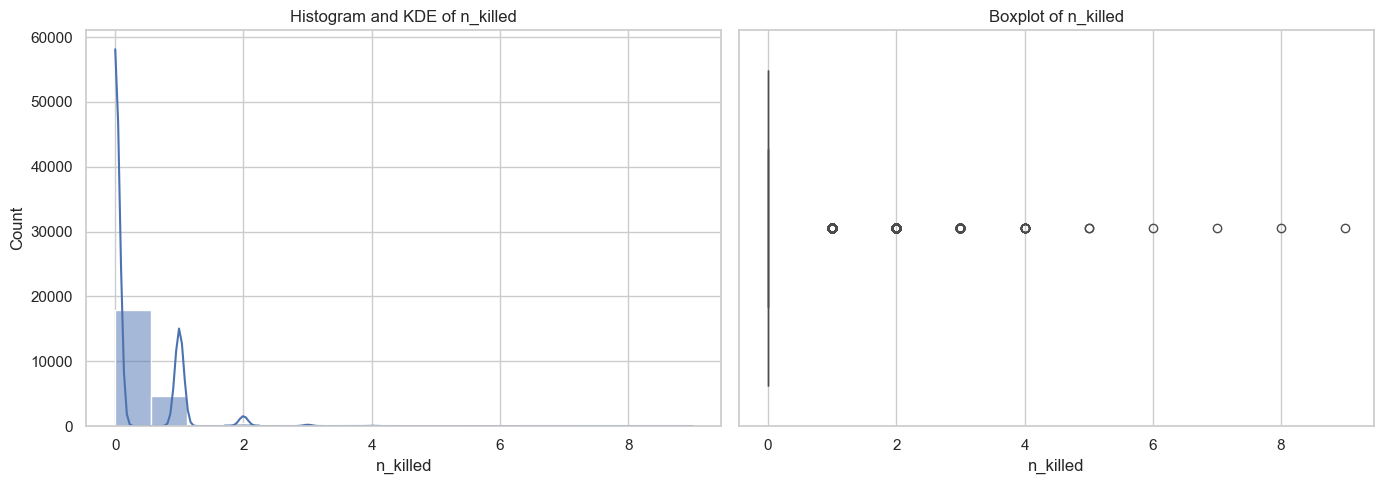

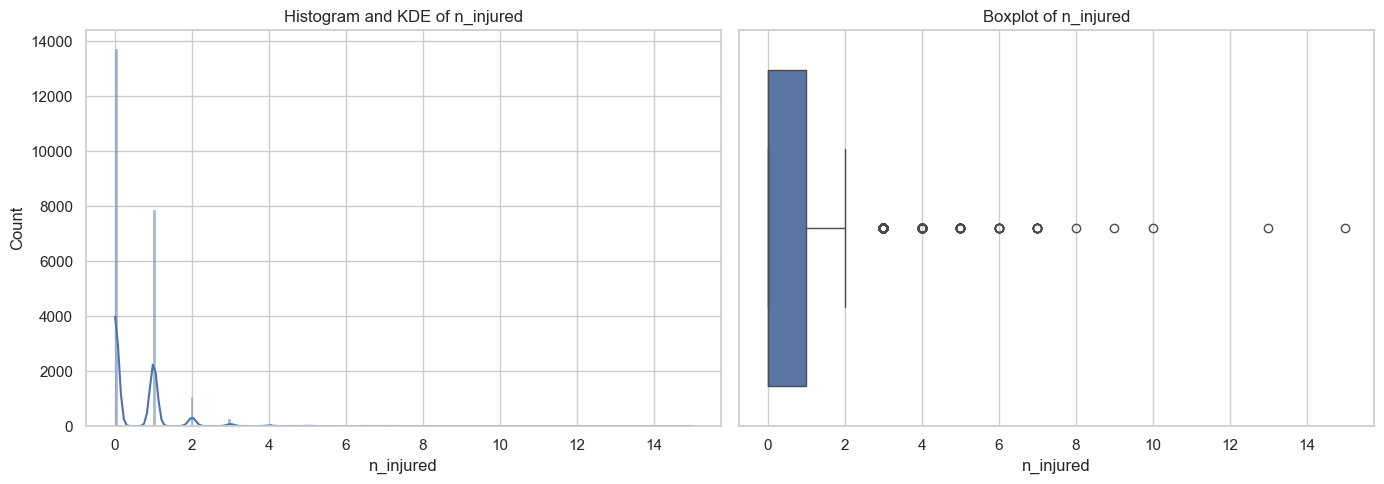

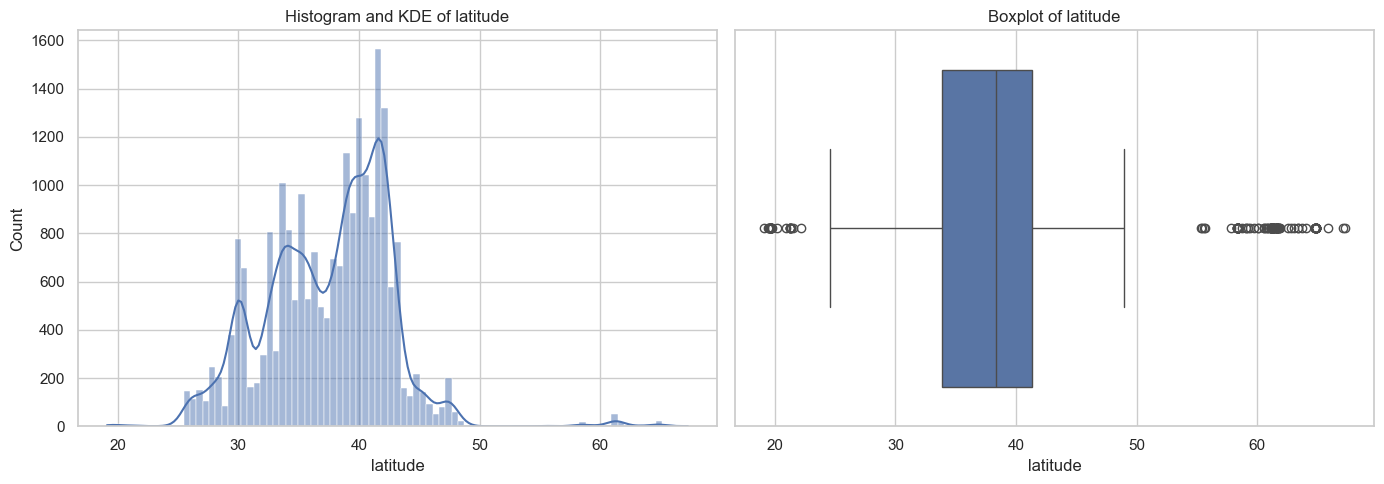

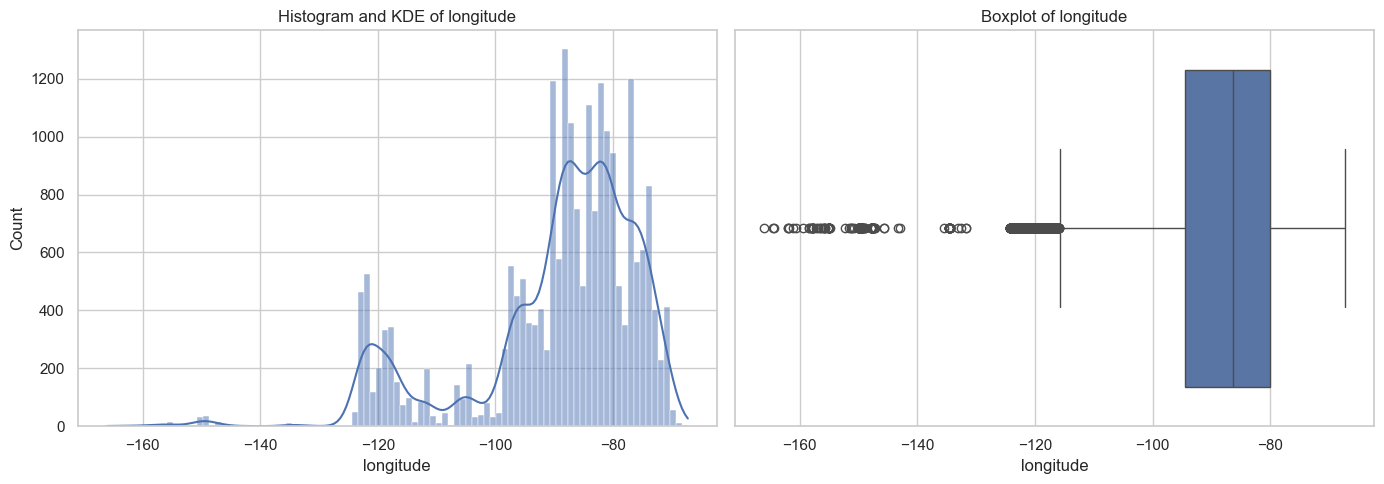

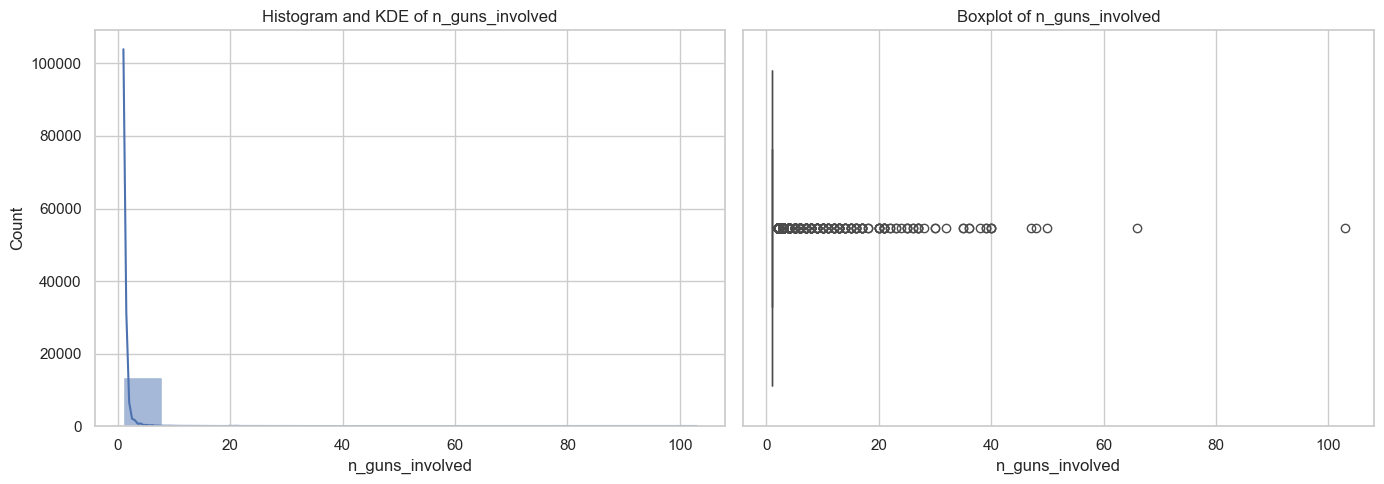

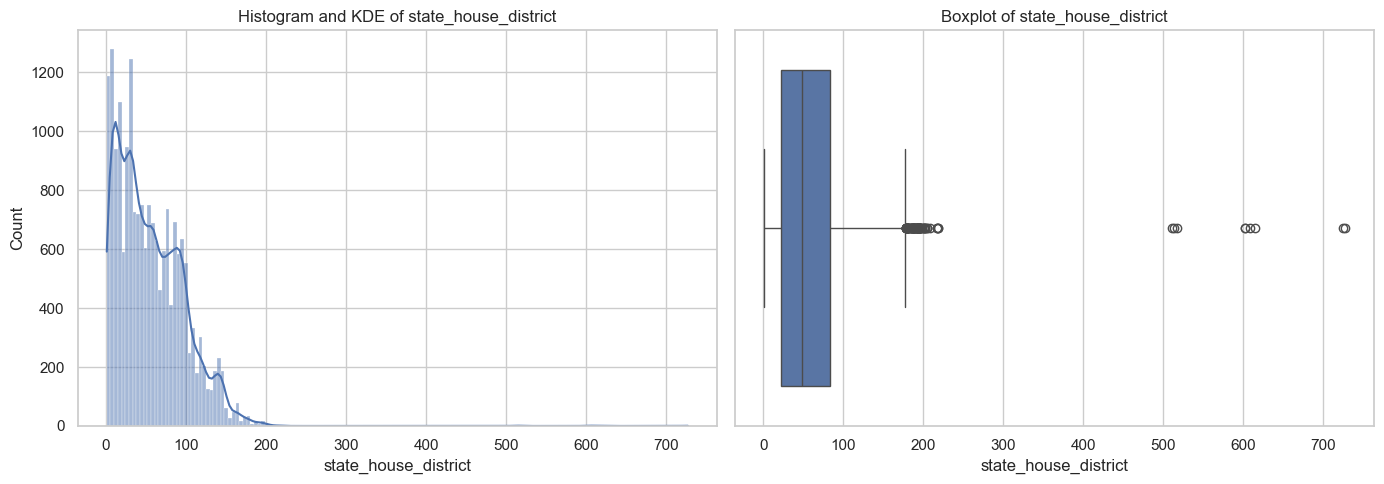

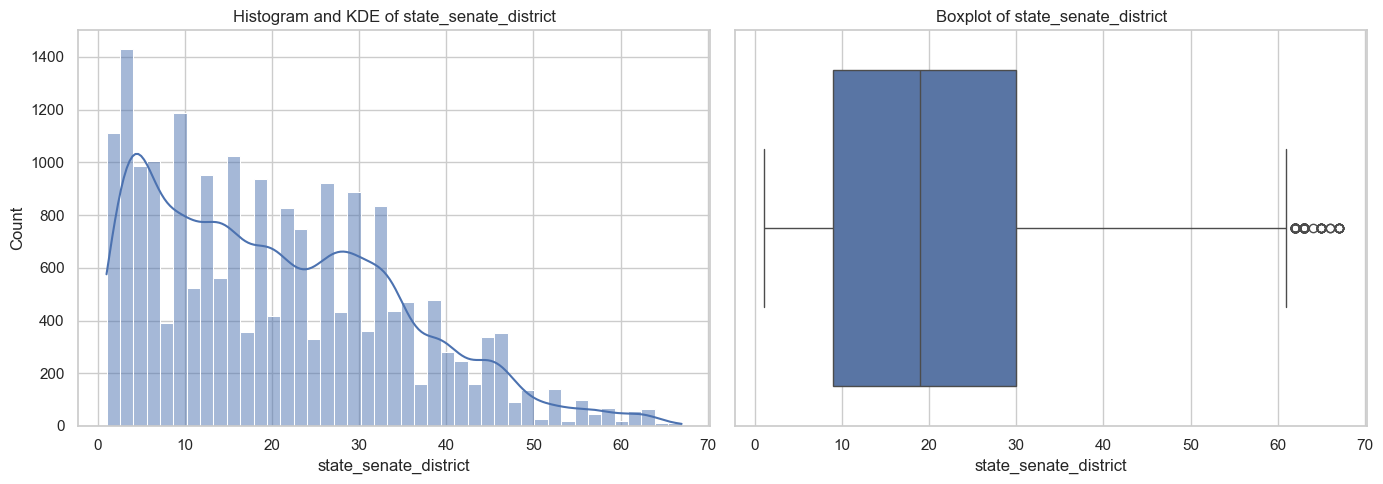

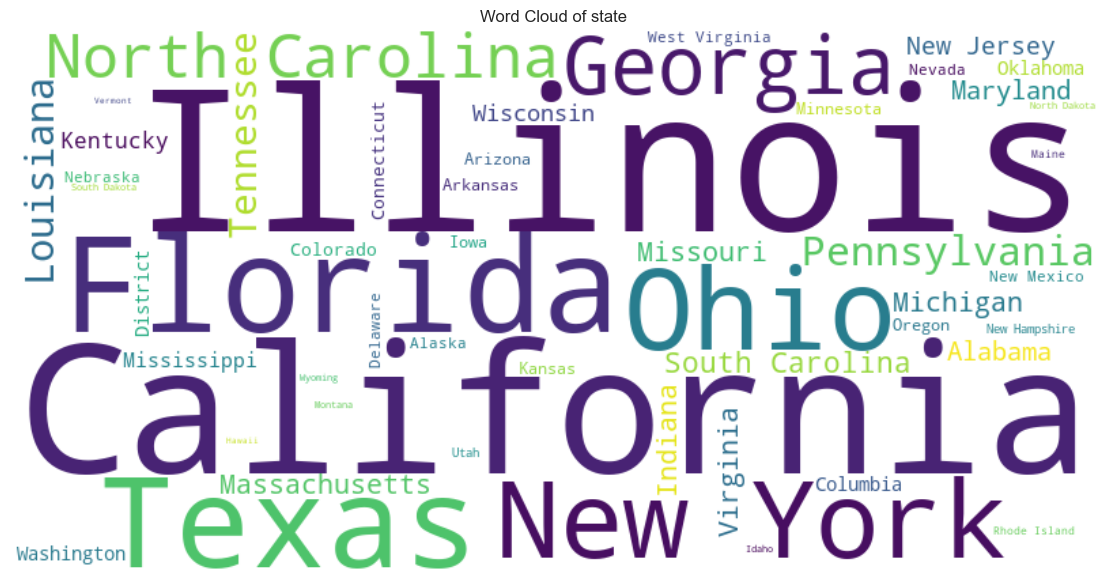

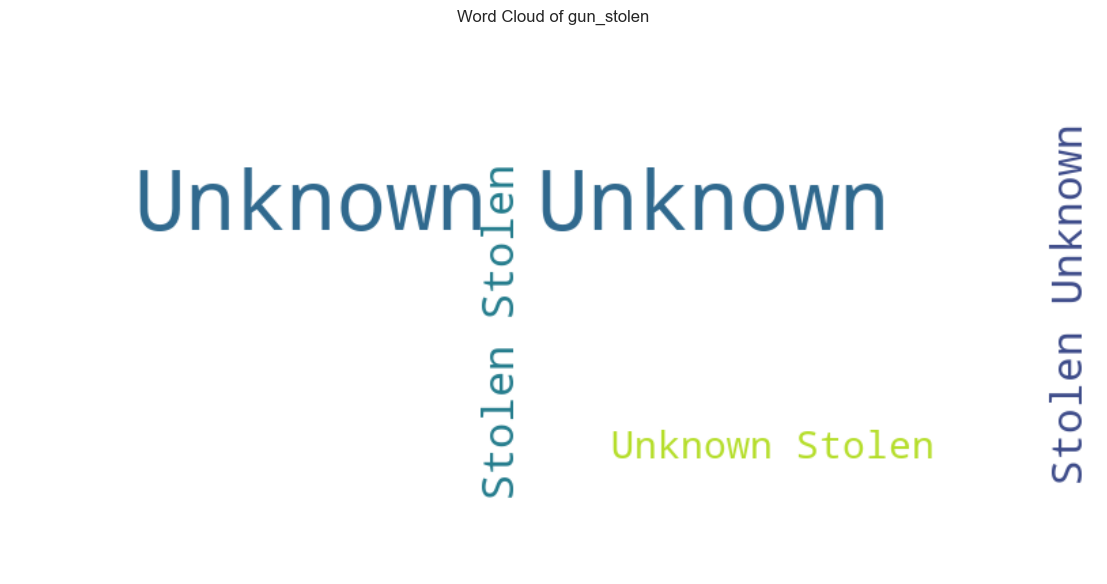

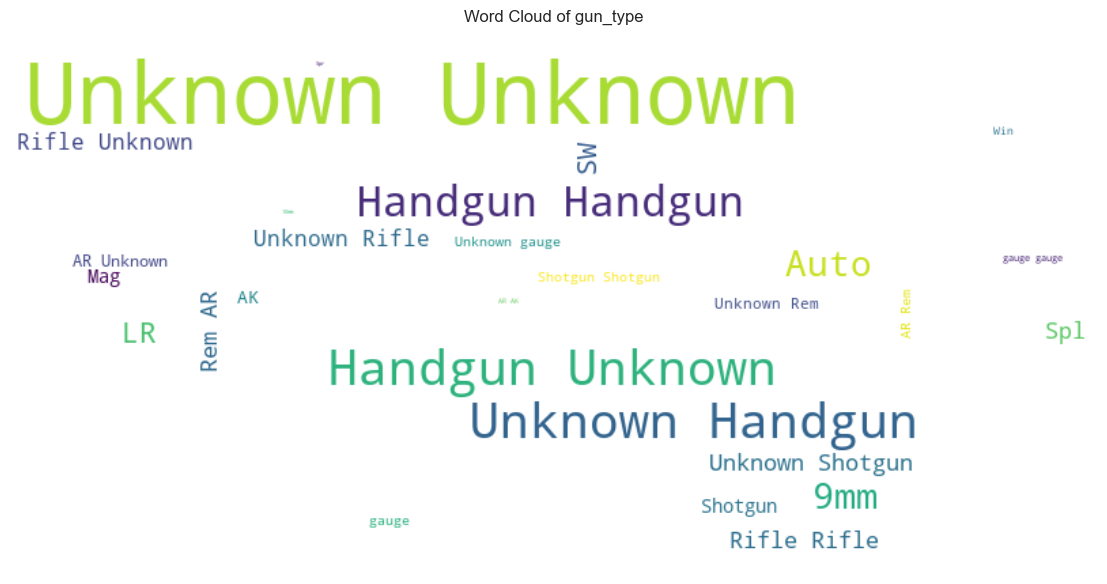

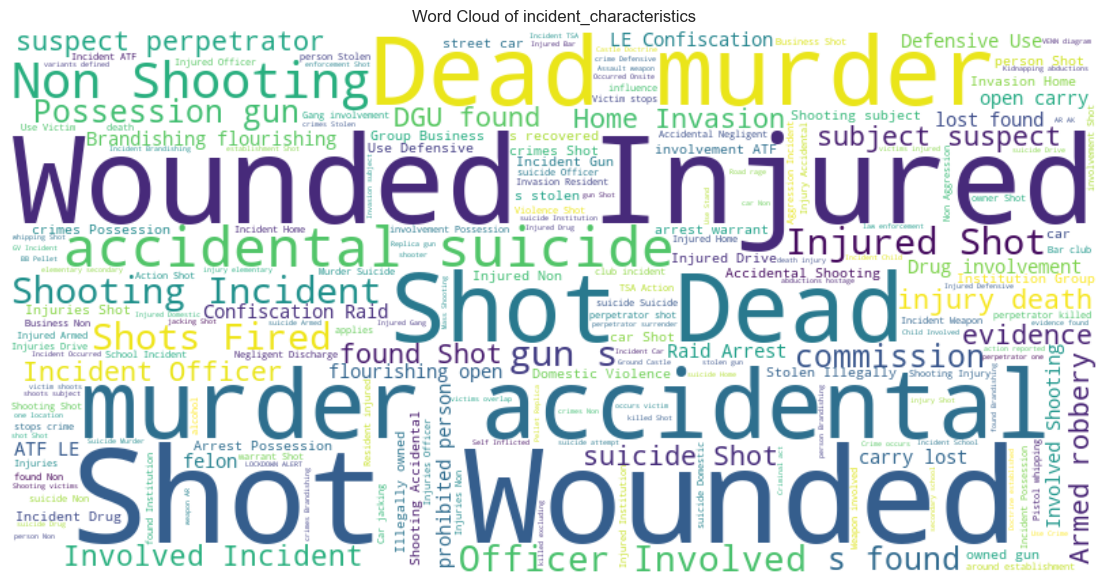

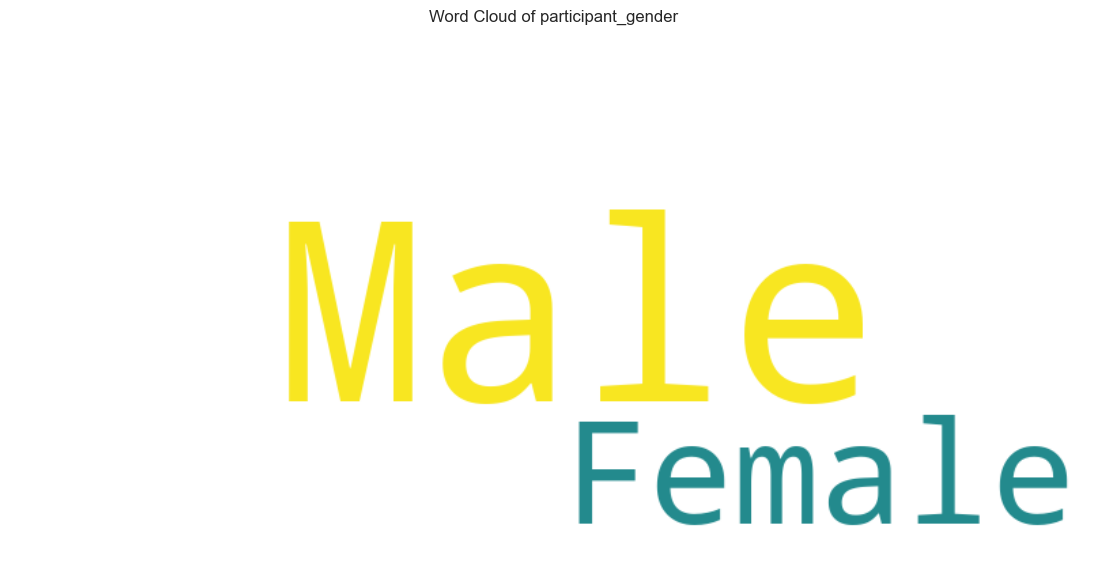

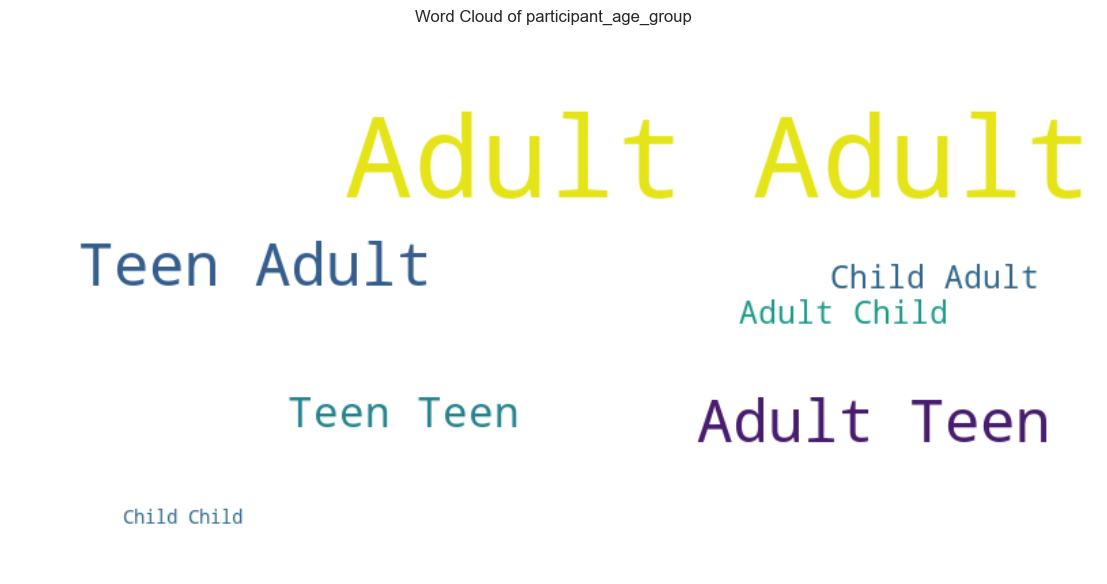

In [19]:

df = pd.read_csv('data.csv')  

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# ------------------ Numerical Univariate Analysis ------------------
numerical_cols = ['n_killed', 'n_injured', 'latitude', 'longitude', 
                  'n_guns_involved', 'state_house_district', 'state_senate_district']

for col in numerical_cols:
    if col in df.columns:
        fig, axs = plt.subplots(1, 2, figsize=(14, 5))
        sns.histplot(df[col].dropna(), kde=True, ax=axs[0])
        axs[0].set_title(f'Histogram and KDE of {col}')
        sns.boxplot(x=df[col].dropna(), ax=axs[1])
        axs[1].set_title(f'Boxplot of {col}')
        plt.tight_layout()
        plt.show()

# ------------------ Categorical Univariate Analysis ------------------
categorical_cols = ['state', 'gun_stolen', 'gun_type', 'incident_characteristics', 
                    'participant_gender', 'participant_age_group']

for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(12, 6))
        if df[col].nunique() > 20:
            text = ' '.join(str(val) for val in df[col].dropna())
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'Word Cloud of {col}')
        else:
            sns.countplot(y=df[col], order=df[col].value_counts().iloc[:10].index)
            plt.title(f'Top 10 Most Frequent Categories in {col}')
        plt.tight_layout()
        plt.show()

Multivariate/Bivariate Analysis

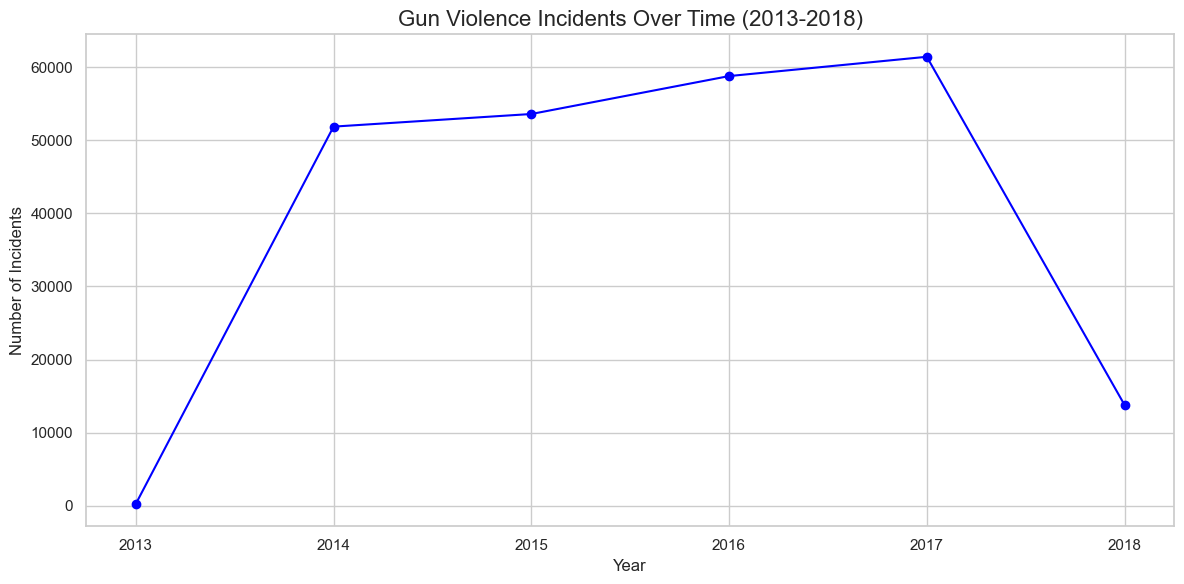

In [20]:
our_data=pd.read_csv("gun-violence-data_01-2013_03-2018.csv")

numCols = ['n_killed', 'n_injured', 'latitude', 'longitude', 'n_guns_involved']
our_datacatCols = ['state', 'city_or_county', 'gun_stolen', 'gun_type', 'incident_characteristics']
our_data[catCols] = our_data[catCols].fillna(our_data[catCols].mode().iloc[0])
dfDropna_temp = our_data.dropna()
dfDropnaColumns_temp = our_data.dropna(axis=1)

our_data['date'] = pd.to_datetime(our_data['date'], errors='coerce') 

our_data['year_month'] = our_data['date'].dt.to_period('M')

yearly_incidents = our_data['year_month'].dt.year.value_counts().sort_index()


plt.figure(figsize=(12, 6))
x_labels = [str(year) for year in yearly_incidents.index]

plt.plot(x_labels, yearly_incidents.values, marker='o', linestyle='-', color='blue')

plt.title('Gun Violence Incidents Over Time (2013-2018)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.grid(True)
plt.xticks() 

plt.tight_layout()
plt.show()


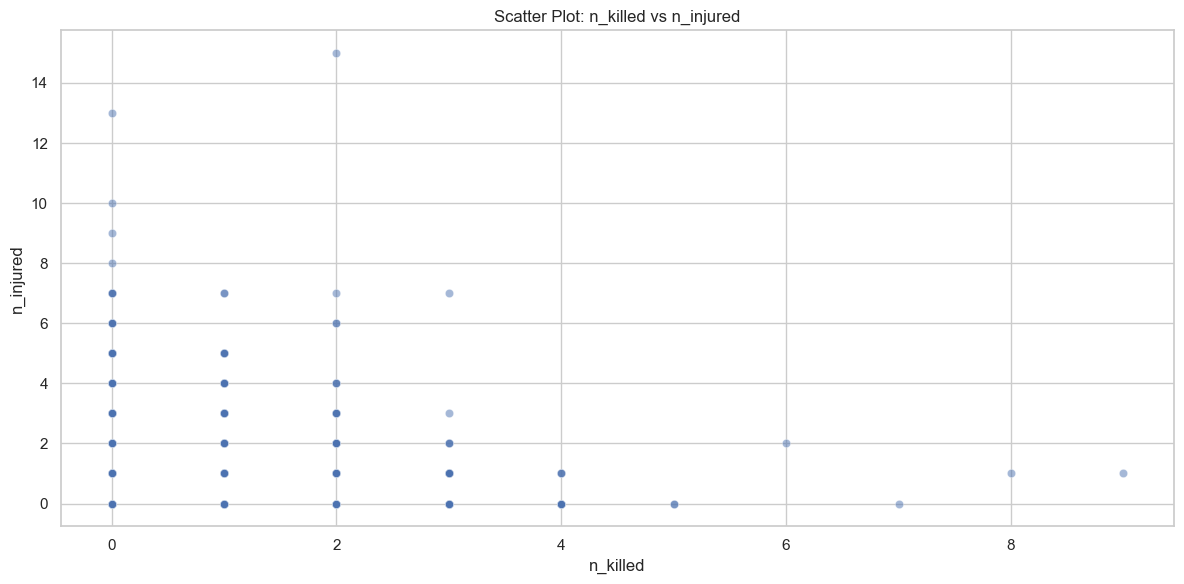

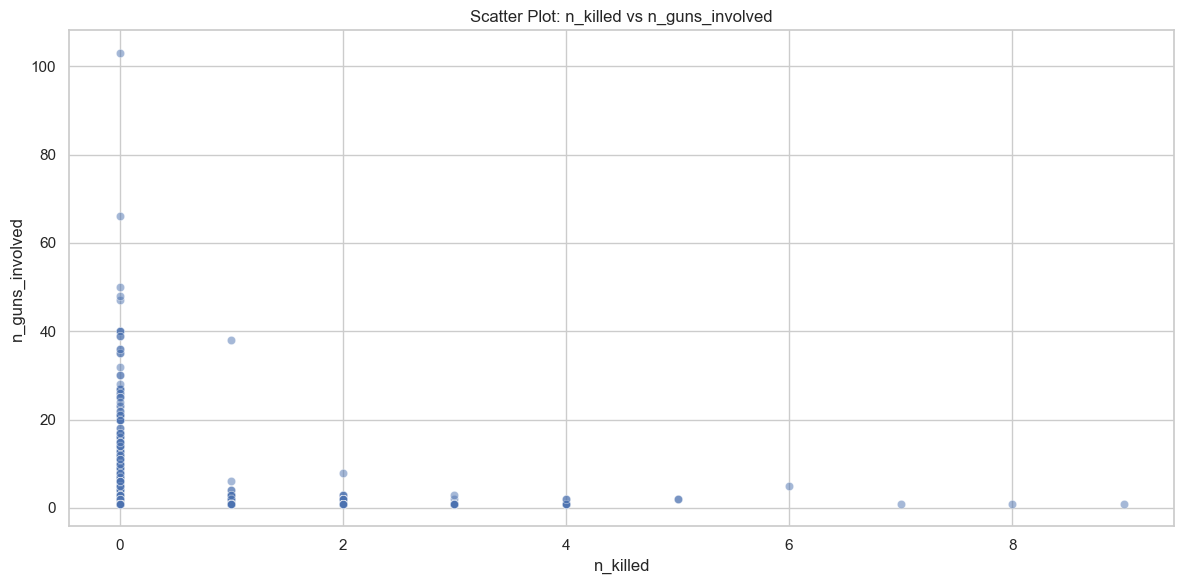

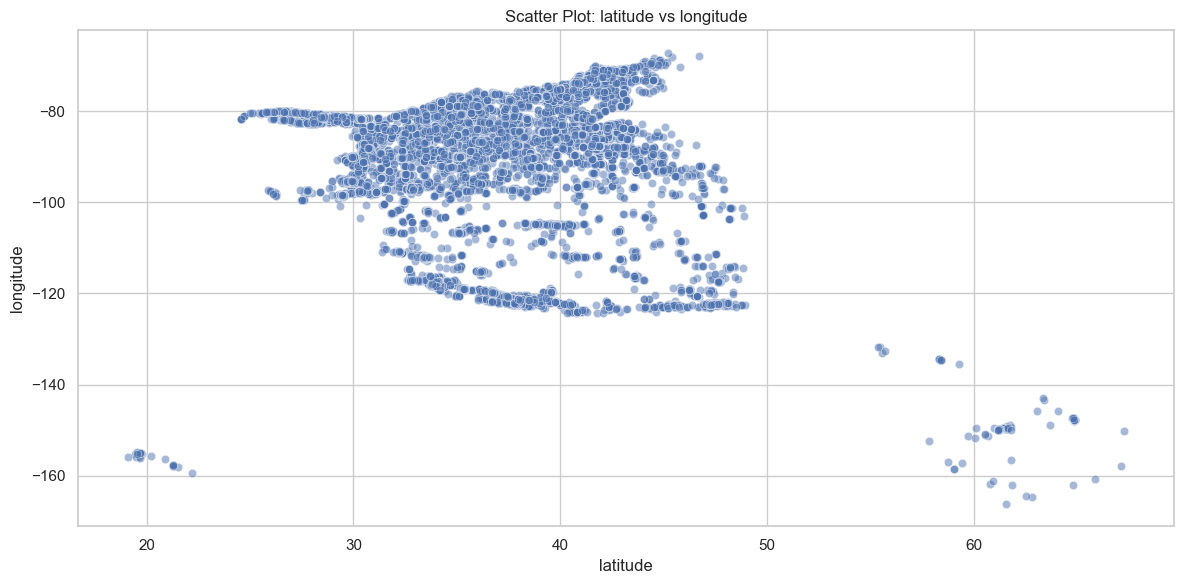

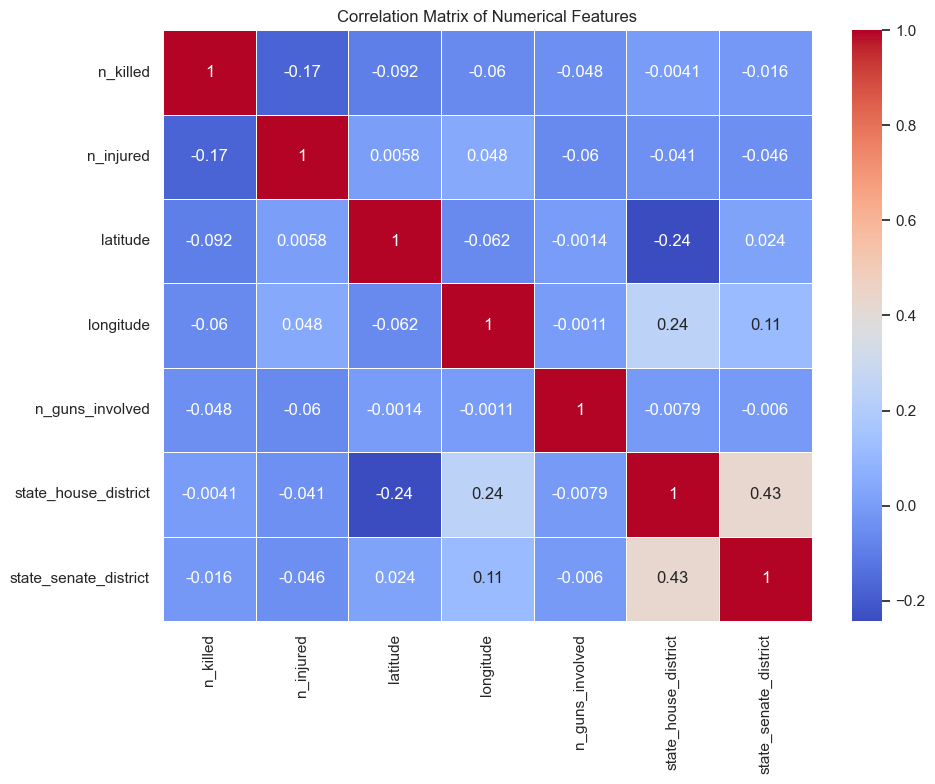

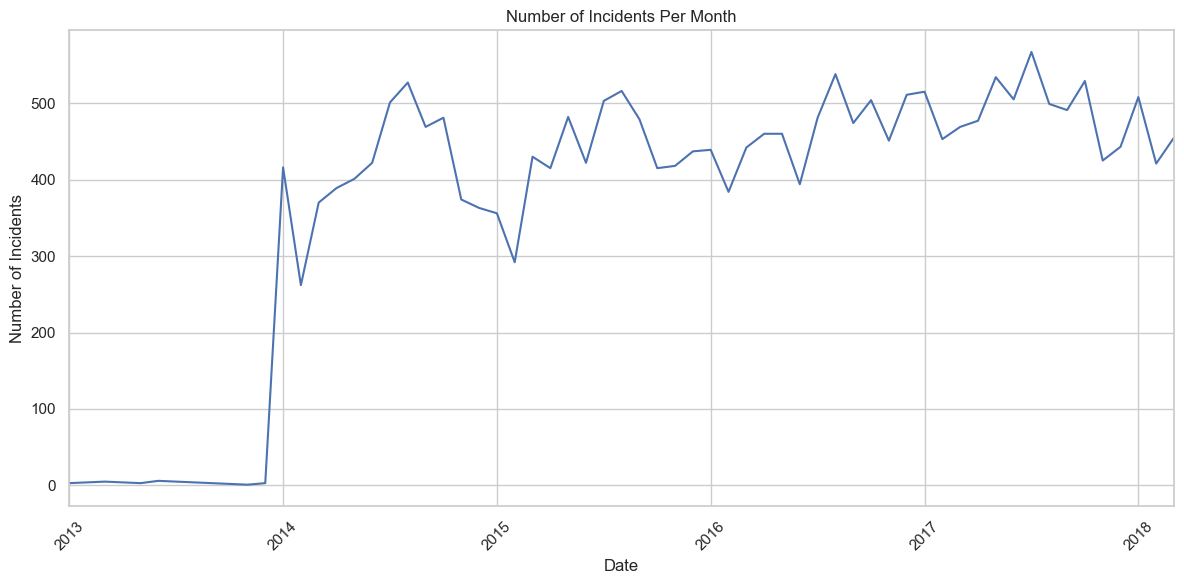

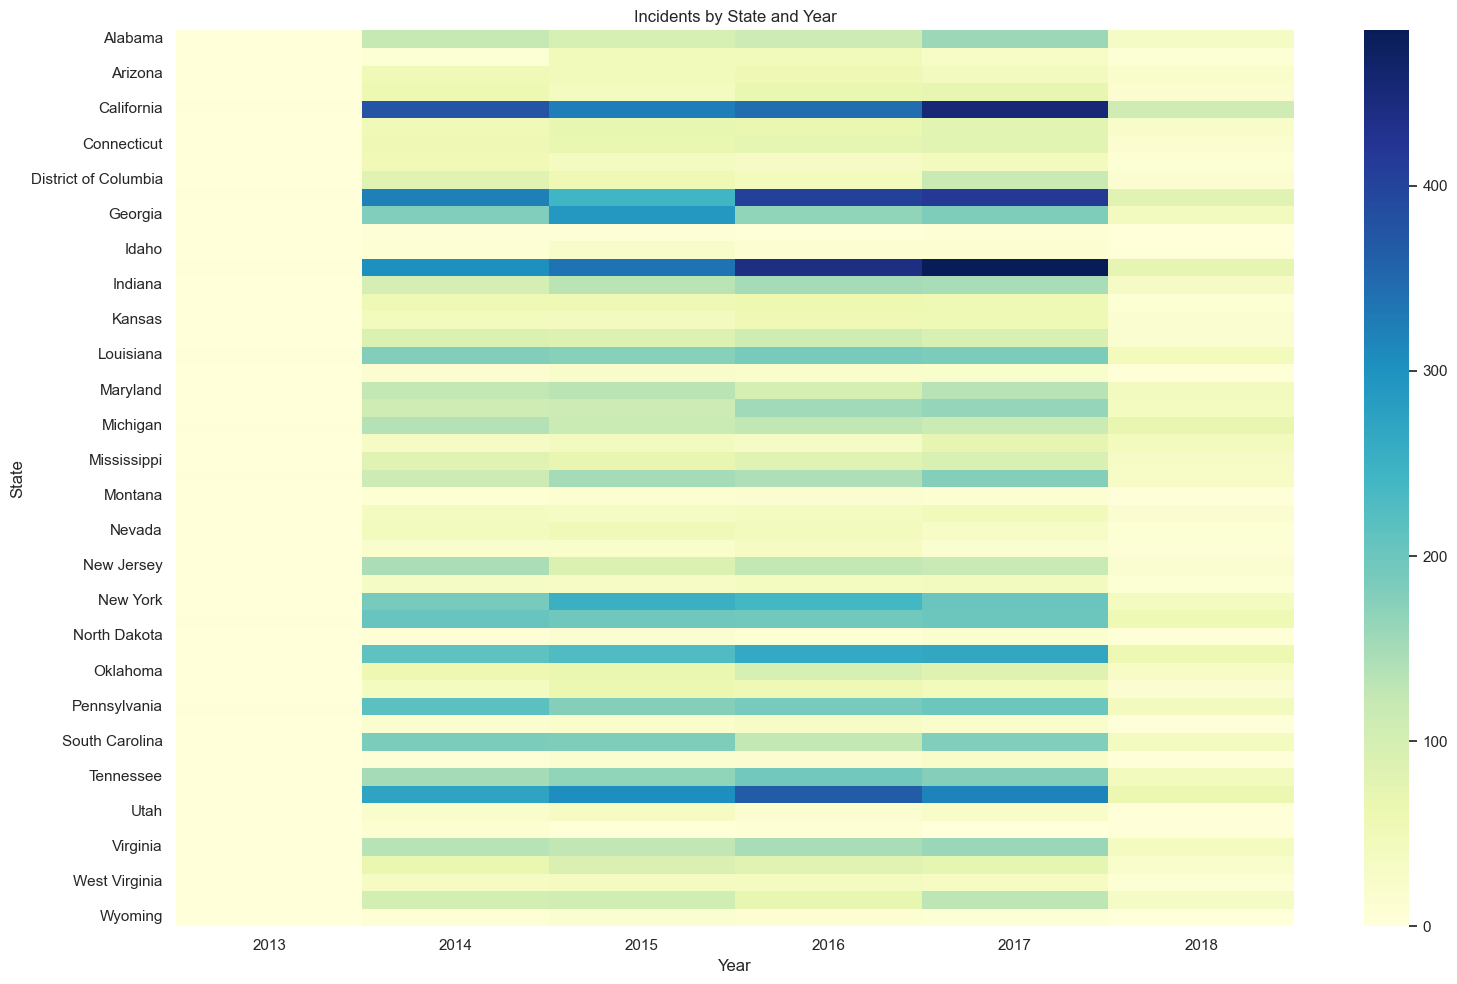

In [21]:
df = pd.read_csv('data.csv')

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# ------------------ Scatter Plots ------------------
# Relationships between numeric variables
scatter_pairs = [
    ('n_killed', 'n_injured'),
    ('n_killed', 'n_guns_involved'),
    ('latitude', 'longitude')
]

for x, y in scatter_pairs:
    if x in df.columns and y in df.columns:
        plt.figure()
        sns.scatterplot(data=df, x=x, y=y, alpha=0.5)
        plt.title(f'Scatter Plot: {x} vs {y}')
        plt.tight_layout()
        plt.show()

# ------------------ Correlation Matrix ------------------
numerical_cols = ['n_killed', 'n_injured', 'latitude', 'longitude', 
                  'n_guns_involved', 'state_house_district', 'state_senate_district']

corr_df = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

# ------------------ Line Chart Example ------------------
# Line chart: Number of incidents per month
df['date'] = pd.to_datetime(df['date'], errors='coerce')
monthly_trend = df.groupby(df['date'].dt.to_period('M')).size()

plt.figure()
monthly_trend.plot()
plt.title("Number of Incidents Per Month")
plt.xlabel("Date")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ------------------ Heatmap: Incidents by State and Year ------------------
df['year'] = df['date'].dt.year
heatmap_data = df.groupby(['state', 'year']).size().unstack(fill_value=0)

plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title("Incidents by State and Year")
plt.xlabel("Year")
plt.ylabel("State")
plt.tight_layout()
plt.show()


## Split data into train and test sets (r)

In [22]:
# features
X = data.drop(['n_killed'], axis=1)
# target variable
y = data['n_killed']
# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of training set (X_train):", X_train.shape)
print("Shape of testing set (X_test):", X_test.shape)
print("Shape of training set (y_train):", y_train.shape)
print("Shape of testing set (y_test):", y_test.shape)

Shape of training set (X_train): (1090, 28)
Shape of testing set (X_test): (273, 28)
Shape of training set (y_train): (1090,)
Shape of testing set (y_test): (273,)


## Regression models (linear) (r)

Model training

In [23]:

X_train_numeric = X_train.select_dtypes(include=['number'])
print("Shape of numeric training data:", X_train_numeric.shape)
model = LinearRegression()
model.fit(X_train_numeric, y_train)
print("\nModel Coefficients:", model.coef_)
print("\nModel Intercept:", model.intercept_)

Shape of numeric training data: (1090, 8)

Model Coefficients: [-3.74231804e-07  2.92757482e-01 -2.64986455e-02 -3.95911533e-02
  8.36837114e-03 -1.17698124e+00 -3.62270415e-03 -1.30574585e-02]

Model Intercept: 6.140504508272253


Evaluation

In [24]:

X_test_numeric = X_test.select_dtypes(include=['number'])

y_pred = model.predict(X_test_numeric)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 0.43482096208511173
Mean Squared Error (MSE): 0.4149274557630522
Root Mean Squared Error (RMSE): 0.644148628627782
R-squared (R2): 0.3827765687883813


Hyper Parameter Tuning for Ridge Regression using GridSearchCV

In [25]:
ridge_model = Ridge()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_numeric, y_train)
best_alpha = grid_search.best_params_['alpha']
best_model = Ridge(alpha=best_alpha)
best_model.fit(X_train_numeric, y_train)
y_pred = best_model.predict(X_test_numeric)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error with tuned Ridge Regression:", mse)

Mean Squared Error with tuned Ridge Regression: 0.4148591688351425
